zadanie 1

dane są: stos ;iczb calkowitych a i pusty b
spowoduj aby ze stosu A zniknął element o najmniejszej wartości położony najgłęvije

In [1]:
class IsEmptyError(Exception):
    pass
class Node:
        def __init__(self, data):
            self.dane = data
            self._next = None
class Stack:
    def __init__(self):
        self.head = None
        self.size = 0
        self.mini = None

    def isEmpty(self):
        return self.size == 0

    def push(self, element):
        nowy = Node(element)  
        if self.isEmpty():
            self.mini = element
        else: 
            if self.mini>element:
                self.mini = element
        nowy._next = self.head          
        self.head = nowy  
        
        self.size += 1                 
        return

    def pop(self):
        if self.isEmpty():
            raise IsEmptyError("Pusty stos!")           
        self.head = self.head._next                                  
        self.size -= 1                 
        return

    def top(self):
        if self.isEmpty():
            raise IsEmptyError("Pusty stos!")               
        return self.head.dane       
    
    def getMin(self):  #zwraca najmniejszy element na stosie w czasie O(1)
        return self.mini
    def list_print(self):
        printval = self.head
        
        for i in range(self.size-1):
            print (str(printval.dane))
            printval = printval._next
        print(printval.dane)

In [2]:
A = Stack()

In [3]:
B = Stack()

In [4]:
lista = [-2, 0, 3, -1, -2, 5]

In [5]:
lista[::4]

[-2, -2]

In [6]:
for i in lista:
    A.push(i)

In [7]:
A.list_print()

5
-2
-1
3
0
-2


In [8]:
def A_do_B(A, B):
    l = []
    index = 0
    mini = A.getMin()
    for i in range(A.size):
        l.append(A.top())
        A.pop()
    for i in range(len(l)):
        if l[i] == mini and i > index:
            index = i
    print(index)
    B.push(l[index])
    l.remove(l[index])
    print(l)
    l = l[::-1]
    for i in range(len(l)):
        A.push(l[i])
    

In [9]:
A_do_B(A, B)

5
[5, -1, 3, 0, -2]


In [10]:
A.list_print()

5
-1
3
0
-2


In [11]:
B.list_print()

-2


zadanie 2.

na wykresie czasu działan programu w funkcji długości danyc -n zaprezentuj złożoność operacji pobierania dowolnego elemenru oraz usunięcia elementu z początku a także dowolnego miejsca jefnikierunkowej linked listy

In [448]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
    def __str__(self):
        return str(self.data)
class LinkedList(Node):
    def __init__(self):
        self.head = None
        self.tail = None
        self.size = 0
    def is_Empty(self):
        return self.head==None 
    # poprawny append 
    
    def append_2(self, dane): ####
        t=self.tail
        self.tail = Node(dane)
        if self.isEmpty() :
            self.head = self.tail
        else:
            t._next = self.tail
        self.size += 1
    # wstawianie na koniec  złożoność O(n)
    def append(self, data):    
        new_Node = Node(data)
        if self.head is None:
            self.head = new_Node
            return
        last_node = self.head
        while(last_node.next):
            last_node = last_node.next
        last_node.next=new_Node
        
    ##wstawianie na początek
    def prepend(self, data):
        new_Node = Node(data)
        new_Node.next = self.head
        self.head = new_Node
        
    ##wstawianie po określonym węźle
    def Inbetween(self,middle_node,newdata):
        if middle_node is None:
            print("middle node is not in a list")
            return

        NewNode = Node(newdata)
        NewNode.next = middle_node.next
        middle_node.next = NewNode
        
    #wstawianie pod indeksem
    def insert(self, data, index):
        if index != None:
            if index == 0:
                self.append(data)
                return
            t = self.head
            node = Node(data)
            for i in range(index-1):
                t = t.next
            node.next = t.next
            t.next = node
            return
        print("index error")
    
    # usuwanie wezła okreslonego
    def remove(self, val):
        HeadVal = self.head
        if (HeadVal is not None):
            if (HeadVal.data == val):
                self.head = HeadVal.next
                HeadVal = None
                return
        while (HeadVal is not None):
            if HeadVal.data == val:
                break
            prev = HeadVal
            HeadVal = HeadVal.next
        if (HeadVal == None):
            return
        prev.next = HeadVal.next
        HeadVal = None
        
    #usuwanie ostatniego
    def remove_last(self):
        HeadVal = self.head
        if (HeadVal is not None):
            if (HeadVal.next == None):
                self.head = HeadVal.next
                HeadVal = None
                return
        while (HeadVal.next is not None):
            prev = HeadVal
            HeadVal = HeadVal.next
        if (HeadVal == None):
            return
        prev.next = HeadVal.next
        HeadVal = None
    
    # usuwanie pierwszego
    def remove_first(self):
        HeadVal = self.head
        if (HeadVal is not None):
            if (HeadVal.next == None):
                self.head = HeadVal.next
                HeadVal = None
                return
        self.head = HeadVal.next
        HeadVal = None
            
    def listprint(self):
        printval = self.head
        while printval is not None:
            print (printval.data)
            printval = printval.next
    
    # ostatni
    def last(self):
        HeadVal = self.head
        
        while HeadVal.next != None:
            prev = HeadVal
            HeadVal = HeadVal.next
        return HeadVal.data
    
        
            
            

In [449]:
import numpy as np
import matplotlib.pyplot as plt
import time

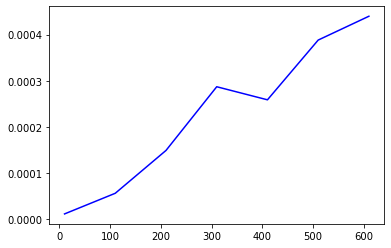

In [450]:
N = [i for i in range(10,700,100)]
A = LinkedList()
times =[] # usuwanie wezła okreslonego //remove


for i in N:
    for k in range(i,0,-1):
        A.append(k)
    a = [k for k in range(i,0,-1)]
    t = time.time()
    A.remove(a)
    t1 = time.time()
    times.append(t1-t)
    
    
plt.plot(N,times,'-b')

plt.show()

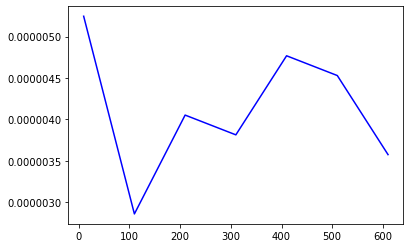

In [451]:
N = [i for i in range(10,700,100)]
A = LinkedList()
times =[] # usuwanie pierwszego  //remove_first


for i in N:
    for k in range(i,0,-1):
        A.append(k)
    a = [k for k in range(i,0,-1)]
    t = time.time()
    A.remove_first()
    t1 = time.time()
    times.append(t1-t)
    
    
plt.plot(N,times,'-b')

plt.show()

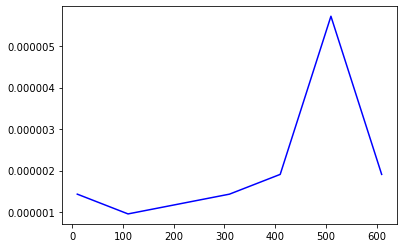

In [452]:
N = [i for i in range(10,700,100)]
A = LinkedList()
times =[] # pierwszy


for i in N:
    for k in range(i,0,-1):
        A.append(k)
    a = [k for k in range(i,0,-1)]
    t = time.time()
    A.head.data
    t1 = time.time()
    times.append(t1-t)
    
    
plt.plot(N,times,'-b')

plt.show()

zadanie 3.

napisz algorytm wyznaczający średnią oraz mefianę elemenrów w posorowanej liście dowiązanej. złożoność czaowa O(n), pamięciowa O(1)

In [ ]:
class IsEmptyError(Exception):
    pass
class Node:
        def __init__(self, data):
            self.dane = data
            self._next = None
class LinkedList:
    def __init__(self):
        self.head = None
        self.size = 0
        self.srednia = 0
        
    def Srednia(self):
        return self.srednia/self.size

    def isEmpty(self):
        return self.size == 0

    def push(self, element):
        nowy = Node(element)  
        self.srednia += element
        nowy._next = self.head          
        self.head = nowy  
        
        self.size += 1                 
        return

    def pop(self):
        if self.isEmpty():
            raise IsEmptyError("Pusty stos!")           
        self.head = self.head._next                                  
        self.size -= 1                 
        return

    def top(self):
        if self.isEmpty():
            raise IsEmptyError("Pusty stos!")               
        return self.head.dane 
    
    def sort(self):
        if self.isEmpty():
            raise IsEmptyError("Pusty stos!")   
        Head = self.head
        box = []
        for i in range(self.size):
            box.append(Head.dane)
            Head=Head._next
        for i in range(1,self.size):
            k=box[i]
            j=i-1
            while j>=0 and box[j]>k:
                box[j+1]=box[j]
                j-=1
            box[j+1]=k
        self.head=None
        box=box[::-1]
        n,self.size=self.size,0
        for i in range(n):
            self.push(box.pop())
            
    def mediana(self):
        printval = self.head
        
        if self.size % 2 != 0:
            for i in range(self.size//2-1):
                printval = printval._next
            return (printval.dane)
        else:
            a,b = None, None
            for i in range(self.size//2):
                printval = printval._next
            a = printval.dane
            printval = printval._next
            b = printval.dane
            return (a+b)/2
    
    def list_print(self):
        printval = self.head
        
        for i in range(self.size-1):
            print (str(printval.dane))
            printval = printval._next
        print(printval.dane)

In [ ]:
lista = [2,4,4,4,6]

In [ ]:
A = LinkedList()

In [ ]:
for i in lista:
    A.push(i)

In [ ]:
A.Srednia()

In [ ]:
A.mediana()

zadanie 4.

drzewa binarne 


 a) napisz funkcje inorder
 
 b) poziomami
 
 c) wyznaczanie liczby węzłów drzewa

In [445]:
class Queue(object):
    def __init__(self):
        self.items = []

    def enqueue(self, item):
        self.items.insert(0, item)

    def dequeue(self):
        if not self.is_empty():
            return self.items.pop()

    def is_empty(self):
        return len(self.items) == 0

    def peek(self):
        if not self.is_empty():
            return self.items[-1].value

    def __len__(self):
        return self.size()

    def size(self):
        return len(self.items)



In [446]:
class Node(object):
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree(object):
    def __init__(self, root):
        self.root = Node(root)

        
    def print_tree(self, visit_type):
        if visit_type == "inorder":
            return self.inorder_print(tree.root, "")
        elif visit_type == "level":
            return self.levelorder_print(tree.root)
        else:
            print("visit type " + str(visit_type) + " brak metody.")
            return False
        
    def node_counter(self, node):
        
        if node is None:
            return 0
        else:
            return 1 + self.node_counter(node.left) + self.node_counter(node.right)

    
    def inorder_print(self, start, visit):
        
        if start:
            visit = self.inorder_print(start.left, visit)
            visit += (str(start.value) + "-")
            visit = self.inorder_print(start.right, visit)
        return visit
   
    def levelorder_print(self, start):
        if start is None:
            return
        q = Queue()
        q.enqueue(start)
        
        v = ""
        while len(q)>0:
            v +=str(q.peek()) + "-"
            node = q.dequeue()
            
            
            if node.left:
                q.enqueue(node.left)
            if node.right:
                q.enqueue(node.right)
                
        return v
### Budujemy ręcznie większe drzewo
#      1
#     / \
#   2   3
#  / \  /\
# 4  5 6  7
tree = BinaryTree(1)
tree.root.left = Node(2)
tree.root.right = Node(3)
tree.root.left.left = Node(4)
tree.root.left.right = Node(5)
tree.root.right.left = Node(6)
tree.root.right.right = Node(7)


print("\nin-order:",tree.print_tree("inorder"))
print("\npoziomy:",tree.print_tree("level"))
print("\nLiczba wezlow w drzewie:", tree.node_counter(tree.root))
    
            


in-order: 4-2-5-1-6-3-7-

poziomy: 1-2-3-4-5-6-7-

Liczba wezlow w drzewie: 7
